In [1]:
import snman
from snman.constants import *

PERIMETER = '_debug'

# Set these paths according to your own setup
data_directory = 'C:/Users/lballo/polybox/Research/SNMan/SNMan Shared/data_v2/'
inputs_path = data_directory + 'inputs/'
process_path = data_directory + 'process/' + PERIMETER + '/'

#export_path = data_directory + 'outputs/' + 'matsim_zrh5 v5' + '/'
export_path = data_directory + 'mapmatching_test_output/' + '_debug' + '/'

#CRS_internal = 29119    # for Boston
CRS_internal = 2056      # for Zurich
CRS_for_export = 4326

C:\Users\lballo\AppData\Roaming\Python\Python39\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
print('Load street graph')
G = snman.io.load_street_graph(
    process_path + 'street_graph_edges.gpkg',
    process_path + 'street_graph_nodes.gpkg',
    crs=CRS_internal
)

Load street graph


In [3]:
# load parking spaces
parking_spots = snman.io.load_parking_spots(inputs_path + 'zurich/strassenparkplaetze.gpkg', crs=CRS_internal)

In [4]:
snman.io.export_gdf(parking_spots, export_path + 'parking_spots_processed.gpkg')

<Axes: >

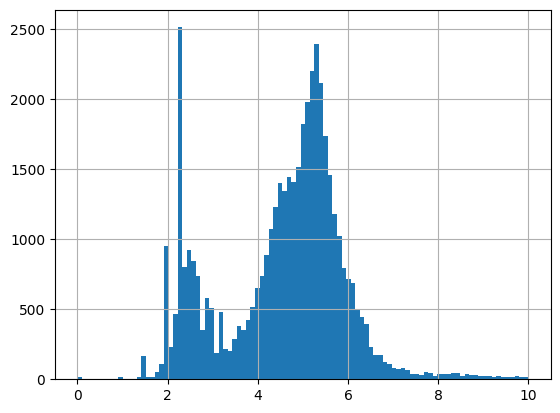

In [5]:
import numpy as np
parking_spots['distance_to_next_space'].hist(bins=np.linspace(0,10,100))

In [6]:
snman.enrichment.match_parking_spots(G, parking_spots)

In [7]:
if 1:
    print('Export network without lanes')
    snman.io.export_street_graph(
        G,
        export_path + 'street_graph_edges.gpkg',
        export_path + 'street_graph_nodes.gpkg',
        crs=CRS_for_export
    )

if 1:
    print('Export lane geometries')
    SCALING = 1
    snman.io.export_street_graph_with_lanes(
        G,
        KEY_LANES_DESCRIPTION,
        export_path + 'lane_geometries.shp',
        scaling=SCALING,
        crs=CRS_for_export
    )
    snman.io.export_street_graph_with_lanes(
        G,
        KEY_LANES_DESCRIPTION_AFTER,
        export_path + 'lane_geometries_after.shp',
        scaling=SCALING,
        crs=CRS_for_export
    )

if 0:
    print('Export lane graphs')
    L_before = snman.street_graph.to_lane_graph(G, KEY_LANES_DESCRIPTION)
    L_after = snman.street_graph.to_lane_graph(G, KEY_LANES_DESCRIPTION_AFTER)
    snman.io.export_street_graph(
        L_before,
        export_path + 'lane_graph_edges.gpkg', export_path + 'lane_graph_nodes.gpkg',
        crs=CRS_for_export
    )
    snman.io.export_street_graph(
        L_after,
        export_path + 'lane_graph_after_edges.gpkg', export_path + 'lane_graph_after_nodes.gpkg',
        crs=CRS_for_export
    )

if 0:
    print('Export OSM XML')
    snman.io.export_osm_xml(G, export_path + 'new_network.osm', EXPORT_OSM_TAGS, uv_tags=True)

Export network without lanes
Export lane geometries


C:\Users\lballo\AppData\Roaming\Python\Python39\site-packages\geopandas\io\file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
